# 5. Support Vector Machines

Support Vector Machines (SVM) are a powerful and flexible ML model, capable of performing linear or nonlinear classification, regression, and even
outlier detection and particularly suited for classification of complex but small- or medium-sized datasets.

### Linear SVM Classification

We can think of a SVM classifier as fitting for the widest possible distance (_large margin classification_) between classes, relying on specific data points (_support vectors_) who lie at the edge of our boundary. 

If we only rely on the most extreme data point, we are looking at **hard** margin classification. In addition to being very sensitive to outlier, sometimes it is not even possible to perform (because the data is not linearly separable). 

To avoid this issues, we generally rely on **soft** margin classification, balancing margin wideness and margin violations. 

In Scikit-learn, we do this by tuning the `C` hyperparameter. Higher C > Narrower margin.  

Here is an implementation example based on the iris flowers dataset:

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)] # petal length, petal width
y = (iris["target"] == 2).astype(np.float64) # Iris-Virginica

svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("linear_svc", LinearSVC(C=1, loss="hinge")),
    ])

svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=1, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [2]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

### Nonlinear SVM Classification

Sometimes, data is not linearly separable but it can be if we apply a transformation (e.g. polynomial features). 

In [3]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from matplotlib import pyplot as plt

polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=10, loss="hinge"))
    ])

polynomial_svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('poly_features',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 LinearSVC(C=10, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

In terms of kernels, we do actually have several options to choose from. The linear kernel should be our default choice, but we may need others in specific circumstances (e.g. string kernels for text docs / DNA sequences). 

Another very good option is the Gaussian **Radial Basic Function** (RBF) kernel:

In [4]:
from sklearn.svm import SVC

rbf_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
    ])
rbf_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=0.001, break_ties=False, cache_size=200,
                     class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=5,
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

To summarize our three approaches for SVM classification:

![SVM classification](images/5.SVM_Classification.jpg)

### SVM Regression

On an intuitive level, regression using SVM works by reversing our logic: instead of fitting the largest possible street _between_ values, we try to fit the as many instances as possible _inside_ the street, with the width controlled by an hyperparameter $\epsilon$.

### Exercises

#### Ex1 

Train a `LinearSVC` on a linearly separable dataset. Then train an `SVC` and a `SGDClassifier` on the same dataset.  
See if you can get them to produce roughly the same model.

For this exercise, we will use the Iris dataset used in this chapter. First, we want to check which types are linearly separable, so we will plot them in 2D:

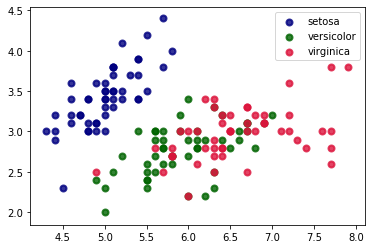

In [9]:
import matplotlib.pyplot as plt

iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names

plt.figure()
colors = ['navy', 'darkgreen', 'crimson']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X[y == i, 0], X[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
    
plt.legend(loc='best', shadow=False, scatterpoints=1)

Ok, it is clear that we can build a linearly separable dataset out of setosa + virginica / versicolor. I will go for versicolor. 